Assignment 3.2: Preparing for Exploratory Data Analysis Using Python 
<br> Name: Michael Hotaling
<br> Date: 2020-09-15

 

In [1]:
from __future__ import print_function, division

import nsfg

# Exercise 1-1

Read NSFG data into a Pandas DataFrame.

In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [3]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [4]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [5]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [6]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [7]:
pregordr[0]

1

Select a slice from a column.

In [8]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [9]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [10]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [11]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [12]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercise 1-1

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [13]:
print("NaN     "+ str(int(preg['birthord'].isnull().sum())))
print(preg['birthord'].value_counts().sort_index().to_string())
print("Total  " + format(preg['birthord'].value_counts().sum() + preg['birthord'].isnull().sum()))

NaN     4445
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Total  13593


<img src="images/BIRTHORD.png">


We can also use `isnull` to count the number of nans.

In [14]:
preg['birthord'].isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [15]:
import pandas as pd

bins = [0, 13, 26, 50]

preglngth = pd.cut(preg['prglngth'], bins).value_counts(dropna = False).sort_index()

print(preglngth)

# The NA values are getting counted in the 0 bin in the codebook so I'll 
# include them in the print-out. They could be changed to 0 using the following code

# preglngth = preglngth.fillna(0)


(0.0, 13.0]     3507
(13.0, 26.0]     793
(26.0, 50.0]    9278
NaN               15
Name: prglngth, dtype: int64


<img src="images/PRGLNGTH.PNG">

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [16]:
preg['totalwgt_lb'].mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [17]:
preg['totalwgt_kg'] = preg['birthwgt_lb'] / 2.20462

print(preg['totalwgt_kg'])

0        3.628743
1        3.175150
2        4.082336
3        3.175150
4        2.721557
           ...   
13588    2.721557
13589         NaN
13590         NaN
13591    3.175150
13592    3.175150
Name: totalwgt_kg, Length: 13593, dtype: float64


`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [18]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [19]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [20]:
print(resp['age_r'].sort_values())
print()
print("The youngest respondent is {} years old.".format(min(resp['age_r'].sort_values())))
print("The oldest respondent is {} years old.".format(max(resp['age_r'].sort_values())))

757     15
7087    15
4526    15
5470    15
2305    15
        ..
4703    44
4000    44
3440    44
1481    44
5645    44
Name: age_r, Length: 7643, dtype: int64

The youngest respondent is 15 years old.
The oldest respondent is 44 years old.


We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [21]:
resp[resp['caseid']==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [22]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,2.721557
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.267965
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.814372
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,2.721557


How old is the respondent with `caseid` 1?

In [23]:
resp[resp['caseid']==1]["age_r"]

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [24]:
preg[preg['caseid']==2298]["prglngth"]

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [25]:
preg[preg['caseid']==5012]["birthwgt_lb"] 

5515    6.0
Name: birthwgt_lb, dtype: float64

# Exercise 1-2

#### Create a file named chap01ex.py and write code that reads the respondent file, 2002FemResp.dat.gz. You might want to start with a copy of nsfg.py and modify it

#### (Hotaling) This is almost entirely lifted from the nsfg.py file. I struggled for hours trying to figure out how to import that dat.gz file and I couldn't get it to work, so my hand was forced. Sorry

In [26]:
import re
import pandas as pd
import numpy as np

class FixedWidthVariables(object):
    def __init__(self, variables, index_base=0):

        self.variables = variables

        # note: by default, subtract 1 from colspecs
        self.colspecs = variables[['start', 'end']] - index_base

        # convert colspecs to a list of pair of int
        self.colspecs = self.colspecs.astype(np.int).values.tolist()
        self.names = variables['name']

    def ReadFixedWidth(self, filename, **options):
        df = pd.read_fwf(filename,
                             colspecs=self.colspecs, 
                             names=self.names,
                             **options)
        return df

def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    dct = ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    return df

def ReadStataDct(dct_file, **options):
    type_map = dict(byte=int, int=int, long=int, float=float, 
                    double=float, numeric=float)

    var_info = []
    with open(dct_file, **options) as f:
        for line in f:
            match = re.search( r'_column\(([^)]*)\)', line)
            if not match:
                continue
            start = int(match.group(1))
            t = line.split()
            vtype, name, fstring = t[1:4]
            name = name.lower()
            if vtype.startswith('str'):
                vtype = str
            else:
                vtype = type_map[vtype]
            long_desc = ' '.join(t[4:]).strip('"')
            var_info.append((start, vtype, name, fstring, long_desc))
            
    columns = ['start', 'type', 'name', 'fstring', 'desc']
    variables = pd.DataFrame(var_info, columns=columns)

    # fill in the end column by shifting the start column
    variables['end'] = variables.start.shift(-1)
    variables.loc[len(variables)-1, 'end'] = 0

    dct = FixedWidthVariables(variables, index_base=1)
    return dct

resp = ReadFemResp()

#### The variable `pregnum` is a recode that indicates how many times each respondent has been pregnant. Print the value counts for this variable and compare them to the published results in the NSFG codebook

In [27]:
bins = [-0.01,0,1,2,3,4,5,6,95]

print("Data from RESP Dataset")

print(resp['pregnum'].value_counts().sort_index())

print(pd.cut(resp['pregnum'], bins).value_counts(dropna = False).sort_index())

print("Total  " + format(resp['pregnum'].value_counts().sum() + resp['pregnum'].isnull().sum()))

Data from RESP Dataset
0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64
(-0.01, 0.0]    2610
(0.0, 1.0]      1267
(1.0, 2.0]      1432
(2.0, 3.0]      1110
(3.0, 4.0]       611
(4.0, 5.0]       305
(5.0, 6.0]       150
(6.0, 95.0]      158
Name: pregnum, dtype: int64
Total  7643


<img src="images/PREGNUM.PNG">

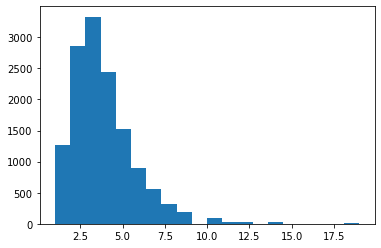

In [28]:
import matplotlib.pyplot as plt

plt.hist(preg['pregnum'], bins = 20);

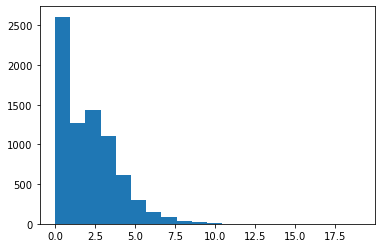

In [29]:
plt.hist(resp['pregnum'], bins = 20);

#### You can also cross-validate the respondent and pregnancy files by comparing `pregnum` for each respondent with the number of records in the pregnancy file.

In [30]:
inconsistencies = 0
inconsistency_list = []

for index_number, preg_num in resp['pregnum'].items():
    caseid = resp['caseid'][index_number]
    index_id = preg_map[caseid]

    if preg_num != len(index_id):
        inconsistency_list.append(caseid)
        inconsistencies += 1
if inconsistencies == 0:
    print("Data is cross-Validated. No inconsistencies found")
else:
        print("Found {} inconsistencies ".format(inconsistencies))
        print(inconsistency_list)


Data is cross-Validated. No inconsistencies found
